In [5]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv("surveydata.csv") #Importing the data as df1
df1.head() #I do this to test if the df1 works

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [6]:
df2 = pd.read_csv("stepsdata.csv", sep=";") #Importing the other data as df2
df2.head() #testing if the data imported right

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier of both df's
df.head() #testing again if this works

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


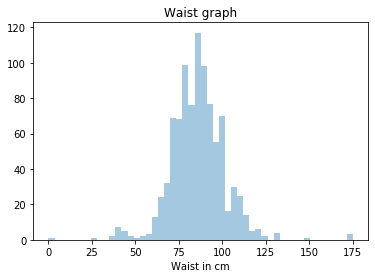

In [4]:
sns.distplot(df['waist'].dropna(), kde=False) 
plt.title('Waist graph')
plt.xlabel('Waist in cm')
plt.show()

I distributed a plot from the waist so I can easily see outliers, which I can later exclude from my dataset. I am excluding everything under 30 cm and above 130 cm waist because it seems abnormal. 

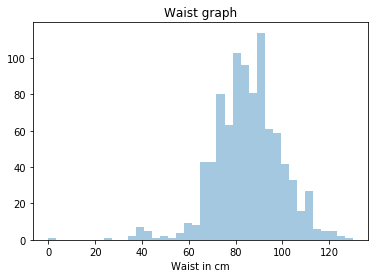

In [5]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def above_130(x):
    if(x > 130): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(above_130)

sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist graph')
plt.xlabel('Waist in cm')
plt.show()

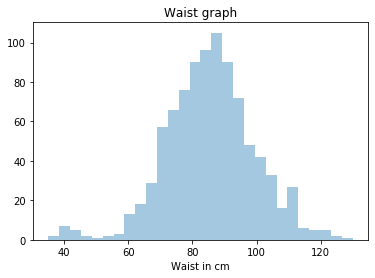

In [6]:
def under_30(x):
    if(x < 30): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(under_30)

sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist graph')
plt.xlabel('Waist in cm')
plt.show()

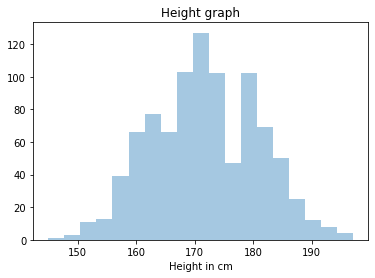

In [7]:
sns.distplot(df['height'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Height graph')
plt.xlabel('Height in cm')
plt.show()

I am doing the same with the height variable but that seems okay, no really big outliers detectable.

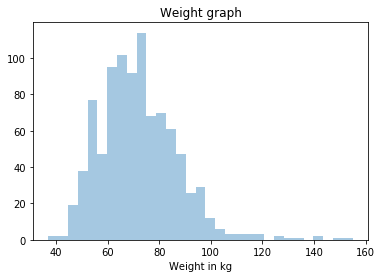

In [10]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight graph')
plt.xlabel('Weight in kg')
plt.show()

Also doing this with weight. Excluding weight above 120 as outliers because it seems (almost) impossible 

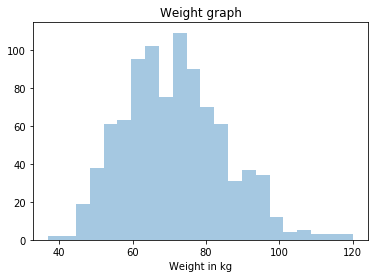

In [8]:
def above_120(x):
    if(x > 120): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_120)

sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight graph')
plt.xlabel('Weight in kg')
plt.show()

Now I cleaned up my data and I am going to print the first lines of my dataset.

In [9]:
df.head() 

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


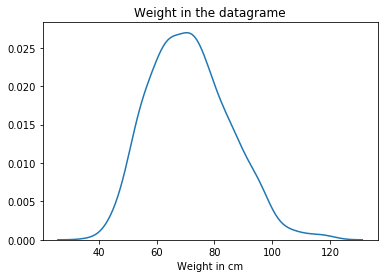

In [13]:
sns.distplot(df["weight"], hist=False)
plt.title('Weight in the datagrame')
plt.xlabel('Weight in cm')
plt.show()

The weight in the dataframe is quite normally distributed. It is a little positively skewed to the right.

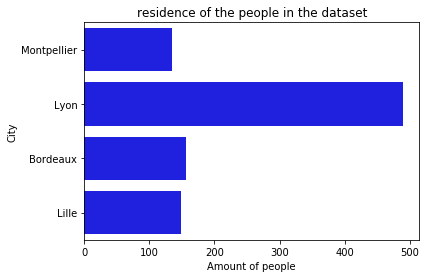

In [25]:
sns.countplot(y="city", data=df, color="b");
plt.title('residence of the people in the dataset')
plt.xlabel('Amount of people')
plt.ylabel('City')
plt.show()

You see that there are four different cities, this makes it maybe interesting to see a correlation where you can see the differences between cities and the amount of steps.

In [36]:
df["11-5-2014"].value_counts()

12858.0    1
2785.0     1
18254.0    1
3689.0     1
6544.0     1
          ..
6820.0     1
21973.0    1
9179.0     1
14798.0    1
4648.0     1
Name: 11-5-2014, Length: 95, dtype: int64

To examine the date and make sure that there are a variability of amount of steps, I printed the value count of one day. I am going to make a plot from this where I am going to analyze the steps that differ in cities and gender. 

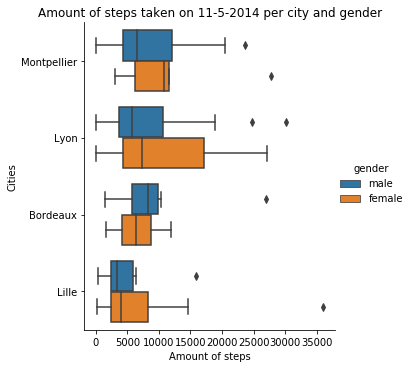

In [39]:
sns.catplot(x="11-5-2014", y="city", hue="gender", kind="box", data=df)
plt.title('Amount of steps taken on 11-5-2014 per city and gender')
plt.xlabel('Amount of steps')
plt.ylabel('Cities')
plt.show()

What we see in the plot above is that the on 11-5-2014, females in Montpelier took the most mean steps. The man in Lille had the least mean steps and also the lowest amount from this day of steps were in Lille by male and female.  

In the steps below I am going to take the quantitative data 'height' as a viewpoint. I am going to analyze the difference of the height between male and female and the difference between cities. 

In [41]:
df["height"]

0      183.0
1      163.0
2      172.0
3      182.0
4      177.0
       ...  
924    177.0
925    172.0
926    169.0
927    167.0
928    190.0
Name: height, Length: 929, dtype: float64

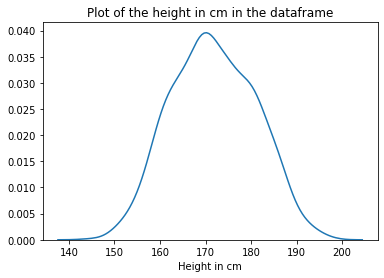

In [44]:
sns.distplot(df["height"], hist=False)
plt.title('Plot of the height in cm in the dataframe')
plt.xlabel('Height in cm')
plt.show()

You can see in the plot above that the height is normally distributed with a very very small skew to the right.

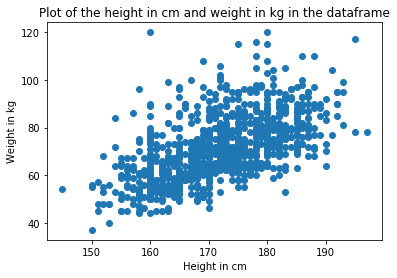

In [70]:
plt.scatter(x='height', y="weight", data=df)
plt.title('Plot of the height in cm and weight in kg in the dataframe')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

In the scatterplot above, you can see that what we assume is right, is right. The higher the person, the more he will probably weight. This is because height is in most cases a correlation for weight. 

In [67]:
print('median: ' + str(float(df['height'].median())))
print('mean: ' + str(float(df['height'].mean())))

median: 172.0
mean: 171.7545945945946


To end this data analysis, I tried to calculate the median and mean of the variable height. The extraordinairy thing is that the median and the mean are both the same in this case. This is not perse a common thing.